<a href="https://colab.research.google.com/github/ulialiau22/hometask-for-DA-school/blob/main/HW_2_Julia_Dmitrieva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson2/hometask/HH-api-hometask.ipynb)

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте DataFrame  добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [5]:
import requests
from tqdm.auto import tqdm
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [3]:
url = f'https://api.hh.ru/vacancies'
params = {
    'employer_id':sber,
    'page':page,
    'per_page':num_per_page,
}
res = requests.get(url, params=params)

In [4]:
res.json()

{'alternate_url': 'https://hh.ru/search/vacancy?control_flag=vacancyBlacklistJoinEnabled%3ATrue&employer_id=3529&enable_snippets=true&items_on_page=100&page=1',
 'arguments': None,
 'clusters': None,
 'found': 4316,
 'items': [{'accept_temporary': False,
   'address': None,
   'adv_response_url': 'https://api.hh.ru/vacancies/67775016/adv_response?host=hh.ru',
   'alternate_url': 'https://hh.ru/vacancy/67775016',
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=67775016',
   'archived': False,
   'area': {'id': '90', 'name': 'Томск', 'url': 'https://api.hh.ru/areas/90'},
   'contacts': None,
   'created_at': '2022-07-14T13:22:58+0300',
   'department': None,
   'employer': {'alternate_url': 'https://hh.ru/employer/3529',
    'id': '3529',
    'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3914324.jpeg',
     '90': 'https://hhcdn.ru/employer-logo/3914323.jpeg',
     'original': 'https://hhcdn.ru/employer-logo-original/868362.JPG'},
    'name': 'СБЕР',
 

In [7]:
res = requests.get(url)

In [8]:
print(res)

<Response [200]>


In [9]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [10]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [11]:
vacancies.get('items')[0]

{'accept_temporary': False,
 'address': None,
 'adv_response_url': 'https://api.hh.ru/vacancies/67775016/adv_response?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/67775016',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=67775016',
 'archived': False,
 'area': {'id': '90', 'name': 'Томск', 'url': 'https://api.hh.ru/areas/90'},
 'contacts': None,
 'created_at': '2022-07-14T13:22:58+0300',
 'department': None,
 'employer': {'alternate_url': 'https://hh.ru/employer/3529',
  'id': '3529',
  'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3914324.jpeg',
   '90': 'https://hhcdn.ru/employer-logo/3914323.jpeg',
   'original': 'https://hhcdn.ru/employer-logo-original/868362.JPG'},
  'name': 'СБЕР',
  'trusted': True,
  'url': 'https://api.hh.ru/employers/3529',
  'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=3529'},
 'has_test': False,
 'id': '67775016',
 'insider_interview': None,
 'name': 'Водитель-инкассатор',
 'premium': False,
 'publis

In [12]:
v = vacancies.get('items')

In [13]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [14]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [15]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [16]:
vnum  = vacancies.get('pages')

In [17]:
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)
    len(all_vacancy_ids)
# https://api.hh.ru/vacancies/66634517

  0%|          | 0/20 [00:00<?, ?it/s]

In [18]:
len(all_vacancy_ids)
# https://api.hh.ru/vacancies/66634517

2000

In [19]:
vacs = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacs.append(res.json())

  0%|          | 0/2000 [00:00<?, ?it/s]

In [20]:
res = requests.get(url)

In [21]:

res.json().keys()

dict_keys(['id', 'premium', 'billing_type', 'relations', 'name', 'insider_interview', 'response_letter_required', 'area', 'salary', 'type', 'address', 'allow_messages', 'experience', 'schedule', 'employment', 'department', 'contacts', 'description', 'branded_description', 'vacancy_constructor_template', 'key_skills', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'specializations', 'professional_roles', 'code', 'hidden', 'quick_responses_allowed', 'driver_license_types', 'accept_incomplete_resumes', 'employer', 'published_at', 'created_at', 'initial_created_at', 'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test', 'alternate_url', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'languages'])

In [22]:
res.json().get('key_skills')

[]

In [23]:
[{'name':'SQL'},{'name':'Python'},{'name':'Git'}]

[{'name': 'SQL'}, {'name': 'Python'}, {'name': 'Git'}]

In [24]:
[x.get('name') for x in [{'name':'SQL'},{'name':'Python'},{'name':'Git'}]]

['SQL', 'Python', 'Git']

In [25]:
vacs[0]

{'accept_handicapped': False,
 'accept_incomplete_resumes': False,
 'accept_kids': False,
 'accept_temporary': False,
 'address': {'building': '2В',
  'city': 'Казань',
  'description': None,
  'lat': 55.835296,
  'lng': 49.103081,
  'metro': None,
  'metro_stations': [],
  'raw': 'Казань, улица Маршала Чуйкова, 2В',
  'street': 'улица Маршала Чуйкова'},
 'allow_messages': True,
 'alternate_url': 'https://hh.ru/vacancy/43756725',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=43756725',
 'archived': False,
 'area': {'id': '88', 'name': 'Казань', 'url': 'https://api.hh.ru/areas/88'},
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'branded_description': '\n<style>\n.tmpl_hh_wrapper p,\n.tmpl_hh_wrapper a,\n.tmpl_hh_wrapper img,\n.tmpl_hh_wrapper ol,\n.tmpl_hh_wrapper ul,\n.tmpl_hh_wrapper li {\n    margin: 0;\n    padding: 0;\n    border: 0;\n    font-size: 100%;\n    font: inherit;\n    vertical-align: baseline;\n}\n\n.tmpl_hh_video {\n    positio

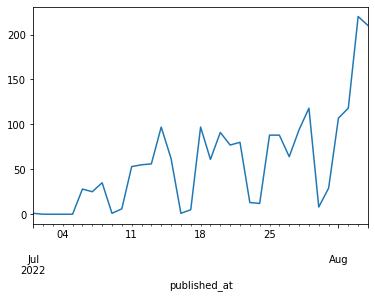

In [26]:
SberVacs = pd.json_normalize(vacs)
SberVacs['published_at'] = pd.to_datetime(SberVacs['published_at'])
SberVacs.set_index('published_at', inplace=True)
SberVacs = SberVacs.resample('D').count()
SberVacs['name'].plot()

In [27]:
SberVacs = pd.json_normalize(vacs)
SberVacs['published_at'] = pd.to_datetime(SberVacs['published_at'])
SberVacs['den_nedely'] = SberVacs['published_at'].apply(lambda x: x.isocalendar()[2])
SberVacs

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,contacts,description,branded_description,...,address,salary,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,department,den_nedely
0,43756725,False,[],Специалист контактного центра,None,False,True,None,"<p>Сбер — это более 60 компаний экосистемы, 14...","\n<style>\n.tmpl_hh_wrapper p,\n.tmpl_hh_wrapp...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,55415805,False,[],Менеджер по работе с клиентами,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,67438948,False,[],Специалист по работе с обращениями клиентов,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,67636579,False,[],Водитель-инкассатор,None,False,False,None,<p>Сбер — лучший работодатель России. У нас бо...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,54718030,False,[],Специалист поддержки корпоративных клиентов,None,False,True,None,<p><strong>Сбер — лучший работодатель России. ...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,67157164,False,[],Старший менеджер по обслуживанию,None,False,False,None,<p>Сбер — лучший работодатель России. У нас бо...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1996,67690983,False,[],Инженер по сопровождению ПО,None,False,True,None,<p><strong>Наш трайб называется Социальные и з...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,Кутузовская,Филевская,4.73,4,55.740544,37.5341,NaN,2
1997,67763137,False,[],Старший клиентский менеджер (Чишмы),None,False,False,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1998,67881481,False,[],Старший менеджер по обслуживанию,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [28]:

SberVacs['published_at'][0].isocalendar()[2]

3

In [29]:
SberVacs['published_at'][0].isocalendar()

(2022, 28, 3)

In [30]:
SberVacs

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,contacts,description,branded_description,...,address,salary,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,department,den_nedely
0,43756725,False,[],Специалист контактного центра,None,False,True,None,"<p>Сбер — это более 60 компаний экосистемы, 14...","\n<style>\n.tmpl_hh_wrapper p,\n.tmpl_hh_wrapp...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,55415805,False,[],Менеджер по работе с клиентами,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,67438948,False,[],Специалист по работе с обращениями клиентов,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,67636579,False,[],Водитель-инкассатор,None,False,False,None,<p>Сбер — лучший работодатель России. У нас бо...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,54718030,False,[],Специалист поддержки корпоративных клиентов,None,False,True,None,<p><strong>Сбер — лучший работодатель России. ...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,67157164,False,[],Старший менеджер по обслуживанию,None,False,False,None,<p>Сбер — лучший работодатель России. У нас бо...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1996,67690983,False,[],Инженер по сопровождению ПО,None,False,True,None,<p><strong>Наш трайб называется Социальные и з...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,Кутузовская,Филевская,4.73,4,55.740544,37.5341,NaN,2
1997,67763137,False,[],Старший клиентский менеджер (Чишмы),None,False,False,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1998,67881481,False,[],Старший менеджер по обслуживанию,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [31]:
#Постройте график опубликованных вакансий по датам
datetime_df = SberVacs.groupby(['published_at'])['name'].count()
datetime_df

published_at
2022-07-01 08:59:26+03:00    1
2022-07-06 06:51:30+03:00    1
2022-07-06 06:59:02+03:00    1
2022-07-06 07:18:43+03:00    1
2022-07-06 07:39:57+03:00    1
                            ..
2022-08-04 19:58:49+03:00    1
2022-08-04 20:02:27+03:00    1
2022-08-04 20:06:19+03:00    1
2022-08-04 20:15:56+03:00    1
2022-08-04 20:26:53+03:00    1
Name: name, Length: 1955, dtype: int64

In [32]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [33]:
datetime_df = SberVacs.groupby(['den_nedely'])['name'].count()
datetime_df

den_nedely
1    345
2    322
3    459
4    503
5    296
6     23
7     52
Name: name, dtype: int64

In [34]:
SberVacs_1 = SberVacs[(SberVacs['name'].str.contains('Python'))|(SberVacs['description'].isin(['python', 'метрики','анализ']))]
SberVacs_1

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,contacts,description,branded_description,...,address,salary,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,department,den_nedely
283,68232217,False,[],Python-разработчик,None,False,True,None,"<p>Мы, команда, которая занимается автоматизац...",\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
446,55564597,False,[],Программист Python,None,False,True,None,<p><strong>О нашем проекте</strong></p> <p>Соб...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,Кутузовская,Филевская,4.73,4,55.740544,37.534100,NaN,3
585,67535645,False,[],Программист Python (Голосовой робот),None,False,True,None,<p><strong>Наш проект:</strong></p> <p>Тебе пр...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
601,68190407,False,[],Разработчик Python,None,False,False,None,<p><strong>О продукте и команде</strong></p> <...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
657,54825644,False,[],Программист Python,None,False,True,None,"<p><strong>SberInfra</strong> — департамент, к...",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
799,68451844,False,[],"Python разработчик (проект ""Навигатор недвижим...",None,False,False,None,<p><strong>Навигатор недвижимости</strong> - п...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
979,68278174,False,[],Python-Разработчик (Управление голосовых серви...,None,False,False,None,<p><strong>Задачи:</strong></p> <ul> <li>Разра...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1071,68258432,False,[],Python-инженер,None,False,True,None,"<p>Мы, команда, которая занимается автоматизац...",\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1116,54739236,False,[],Python разработчик,None,False,False,None,<p>Наша команда занимаемся развитием и сопрово...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1313,67620135,False,[],Python-разработчик,None,False,False,None,<p>Мы работаем над автоматизированными инструм...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [35]:
SberVacs_1.groupby(['key_skills'])['name'].count()

TypeError: ignored

In [38]:
for key, value in SberVacs_1.key_skills.items():
          print(key, value)

283 [{'name': 'Python'}, {'name': 'MongoDB'}, {'name': 'SQL'}, {'name': 'JavaScript'}, {'name': 'Django Framework'}]
446 [{'name': 'Python'}, {'name': 'Git'}, {'name': 'SQL'}, {'name': 'Django Framework'}, {'name': 'PostgreSQL'}, {'name': 'Django'}, {'name': 'PyTest'}, {'name': 'Flask'}, {'name': 'JS'}, {'name': 'RabbitMQ'}, {'name': 'Rest API'}, {'name': 'IBM MQ'}, {'name': 'Kafka'}]
585 [{'name': 'Python'}, {'name': 'Ориентация на результат'}, {'name': 'TDD'}, {'name': 'Soft skills'}, {'name': 'Работа с банками'}]
601 []
657 [{'name': 'Git'}, {'name': 'Linux'}, {'name': 'Docker'}, {'name': 'Python'}, {'name': 'Kubernetes'}]
799 [{'name': 'Python'}, {'name': 'ООП'}, {'name': 'Pytest'}, {'name': 'Flask'}, {'name': 'FastApi'}, {'name': 'kafka'}]
979 []
1071 [{'name': 'Python'}, {'name': 'MongoDB'}, {'name': 'SQL'}, {'name': 'JavaScript'}, {'name': 'Git'}]
1116 []
1313 []
1467 [{'name': 'Git'}, {'name': 'Linux'}, {'name': 'Docker'}, {'name': 'Python'}, {'name': 'Kubernetes'}]
1598 [{'nam

In [39]:
SberVacs_1['skills'] = SberVacs_1['key_skills'].apply(lambda x: [sub['name'] for sub in x])
SberVacs_1.skills                                                                                                                                                                                                                           
SberVacs_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,contacts,description,branded_description,...,salary,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,department,den_nedely,skills
283,68232217,False,[],Python-разработчик,None,False,True,None,"<p>Мы, команда, которая занимается автоматизац...",\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"[Python, MongoDB, SQL, JavaScript, Django Fram..."
446,55564597,False,[],Программист Python,None,False,True,None,<p><strong>О нашем проекте</strong></p> <p>Соб...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,Кутузовская,Филевская,4.73,4,55.740544,37.534100,NaN,3,"[Python, Git, SQL, Django Framework, PostgreSQ..."
585,67535645,False,[],Программист Python (Голосовой робот),None,False,True,None,<p><strong>Наш проект:</strong></p> <p>Тебе пр...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"[Python, Ориентация на результат, TDD, Soft sk..."
601,68190407,False,[],Разработчик Python,None,False,False,None,<p><strong>О продукте и команде</strong></p> <...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,[]
657,54825644,False,[],Программист Python,None,False,True,None,"<p><strong>SberInfra</strong> — департамент, к...",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"[Git, Linux, Docker, Python, Kubernetes]"
799,68451844,False,[],"Python разработчик (проект ""Навигатор недвижим...",None,False,False,None,<p><strong>Навигатор недвижимости</strong> - п...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"[Python, ООП, Pytest, Flask, FastApi, kafka]"
979,68278174,False,[],Python-Разработчик (Управление голосовых серви...,None,False,False,None,<p><strong>Задачи:</strong></p> <ul> <li>Разра...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,[]
1071,68258432,False,[],Python-инженер,None,False,True,None,"<p>Мы, команда, которая занимается автоматизац...",\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"[Python, MongoDB, SQL, JavaScript, Git]"
1116,54739236,False,[],Python разработчик,None,False,False,None,<p>Наша команда занимаемся развитием и сопрово...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,[]
1313,67620135,False,[],Python-разработчик,None,False,False,None,<p>Мы работаем над автоматизированными инструм...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,[]


In [46]:
SberVacs_1['skills'].explode().value_counts()

Python                     12
Git                         6
Docker                      5
SQL                         4
Django Framework            4
JavaScript                  3
Linux                       3
PostgreSQL                  2
Flask                       2
Kubernetes                  2
MongoDB                     2
FastApi                     1
ООП                         1
Pytest                      1
HighLoad                    1
kafka                       1
ML                          1
C++                         1
Английский язык             1
Adobe Photoshop             1
ElasticSearch               1
TDD                         1
Работа с банками            1
Soft skills                 1
Ориентация на результат     1
Kafka                       1
IBM MQ                      1
Rest API                    1
RabbitMQ                    1
JS                          1
PyTest                      1
Django                      1
Redis                       1
Name: skil